#Hadoop on Colab

Content:

1.   [Installing Java 8](#scrollTo=Kxt9UbTArwTC)
2.   [Installing Secure Shell Server (SSHD)](#scrollTo=E1_rIFHNb1zk)
3.   [Installing Hadoop 3.2.3](#scrollTo=qCeL0IBlrnoF)
4.   [Running Hadoop in standalone mode](#scrollTo=xyNhcphwU326)
5.   [Running Hadoop in Pseudo-distributed mode](#scrollTo=lEWV2YjJmR78)

##Introduction

Hadoop is an open-source framework which is mainly used for storage purposes and maintaining and analyzing a large amount of data or datasets on the clusters of commodity hardware, which means it is actually a data management tool.

Hadoop mainly works on 3 different modes:

*   Standalone Mode
*   Pseudo-distributed Mode
*   Fully-distributed Mode


**Standalone Mode**

By default, Hadoop is configured to run in a non distributed mode. It runs as a single Java process. Instead of HDFS, this mode utilizes the local file system. This mode is useful for debugging and there isn't any need to configure core-site.xml, hdfs-site.xml, mapred-site.xml, masters & slaves. Stand-alone mode is usually the fastest mode in Hadoop.

**Pseudo-distributed Mode**

Hadoop can also run on a single node in a Pseudo-distributed mode. In this mode, each daemon runs on separate java processes. In this mode custom configuration is required (core-site.xml, hdfs-site.xml, mapred-site.xml). Here HDFS is utilized for input and output. This mode of deployment is useful for testing and debugging purposes.

**Fully-distributed Mode**

This is the production mode of Hadoop. In this mode typically one machine in the cluster is designated as NameNode and another as Resource Manager exclusively. These are masters. All other nodes act as Data Node and Node Manager. These are the slaves. Configuration parameters and environment need to be specified for Hadoop Daemons.

##Installing Java 8

Hadoop is a java programming-based data processing framework

OpenJDK is a development environment for building applications, applets, and components using the Java programming language.

In [2]:
#Checking the installed Java version
!java -version

openjdk version "11.0.15" 2022-04-19
OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)


Installing java 8 for better compatibility with Hadoop

In [2]:
#Installing java 8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# -q, quiet level 2: no output except for errors
#> /dev/null on the end of any command where you want to redirect all the stdout into nothingness

Switching java default version

In [2]:
#Switching java version to use as default (choose option 2)
!update-alternatives --config java

There are 2 choices for the alternative java (providing /usr/bin/java).

  Selection    Path                                            Priority   Status
------------------------------------------------------------
* 0            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      auto mode
  1            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      manual mode
  2            /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java   1081      manual mode

Press <enter> to keep the current choice[*], or type selection number: 2
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode


In [2]:
#Switching javac version to use as default (choose option 2)
!update-alternatives --config javac

There are 2 choices for the alternative javac (providing /usr/bin/javac).

  Selection    Path                                          Priority   Status
------------------------------------------------------------
* 0            /usr/lib/jvm/java-11-openjdk-amd64/bin/javac   1111      auto mode
  1            /usr/lib/jvm/java-11-openjdk-amd64/bin/javac   1111      manual mode
  2            /usr/lib/jvm/java-8-openjdk-amd64/bin/javac    1081      manual mode

Press <enter> to keep the current choice[*], or type selection number: 2
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/bin/javac to provide /usr/bin/javac (javac) in manual mode


In [2]:
#Switching jps version to use as default (choose option 2)
!update-alternatives --config jps

There are 2 choices for the alternative jps (providing /usr/bin/jps).

  Selection    Path                                        Priority   Status
------------------------------------------------------------
* 0            /usr/lib/jvm/java-11-openjdk-amd64/bin/jps   1111      auto mode
  1            /usr/lib/jvm/java-11-openjdk-amd64/bin/jps   1111      manual mode
  2            /usr/lib/jvm/java-8-openjdk-amd64/bin/jps    1081      manual mode

Press <enter> to keep the current choice[*], or type selection number: 2
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/bin/jps to provide /usr/bin/jps (jps) in manual mode


In [2]:
#Checking Java default version
!java -version

openjdk version "1.8.0_312"
OpenJDK Runtime Environment (build 1.8.0_312-8u312-b07-0ubuntu1~18.04-b07)
OpenJDK 64-Bit Server VM (build 25.312-b07, mixed mode)


Creating Java related environment variables

The JAVA_HOME is an operating system environment variable points to the file system location where the JDK or JRE was installed.

In [2]:
#Finding the default Java path
!readlink -f /usr/bin/java | sed "s:bin/java::"

/usr/lib/jvm/java-8-openjdk-amd64/jre/


In [2]:
#Importing os module
import os
#Creating environment variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["JRE_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64/jre"
os.environ["PATH"] += ":$JAVA_HOME/bin:$JRE_HOME/bin:$HADOOP_HOME/bin:$HADOOP_HOME/sbin"

## Installing Secure Shell Server (SSHD)

We need to define a means for the master node to remotely access every node in our cluster.

Hadoop uses passphrases SSH for the communication between the nodes.

SSH is a cryptographic network protocol for operating network services securely over an unsecured network.

SSH utilizes standard public key criptography to create a pair of keys for user verification: one public and one private.

In [2]:
#It is good practice to purge before installation
!apt-get purge openssh-server -qq

In [2]:
#Installing openssh-server
!apt-get install openssh-server -qq > /dev/null

In [2]:
#Starting the server
!service ssh start

 * Starting OpenBSD Secure Shell server sshd
   ...done.


The port number for SSH is 22 by default

In [2]:
!grep Port /etc/ssh/sshd_config

#Port 22
#GatewayPorts no


The pseudo distributed mode is special case of fully the distributed mode, in which the single host is localhost (our machine). We need to make sure that to access to localhost and login we do not need to enter a password. Therefore, SSH needs to be set up to allow passwordless login for the Hadoop user. The simplest way to achive this is to generate a public-private key pair.

In [2]:
#Creating a new rsa key pair with empty password
!ssh-keygen -t rsa -P "" -f ~/.ssh/id_rsa

Generating public/private rsa key pair.
Your identification has been saved in /root/.ssh/id_rsa.
Your public key has been saved in /root/.ssh/id_rsa.pub.
The key fingerprint is:
SHA256:C4S0g7LR3HbtY6LnaRscpyqTTiHWv6fdQ0imcuI6Fpg root@b6c4a8758417
The key's randomart image is:
+---[RSA 2048]----+
|    .            |
| o + o .         |
|o + * o .        |
| +.. + +         |
|+o..  B S        |
|Eo +.= O +       |
|  +.=.= o        |
| ++. +++..       |
|.o+o.+*o ..      |
+----[SHA256]-----+


In [2]:
#Showing the public key
!more /root/.ssh/id_rsa.pub

In [2]:
#Copying the key to autorized keys
!cat $HOME/.ssh/id_rsa.pub>>$HOME/.ssh/authorized_keys
#Changing the permissions on the key
!chmod 0600 ~/.ssh/authorized_keys

In [2]:
#Conneting with the local machine
!ssh -o StrictHostKeyChecking=no localhost uptime

 08:17:05 up 6 min,  0 users,  load average: 0.92, 0.67, 0.33


## Installing Hadoop 3.2.3

In [2]:
#Downloading Hadoop 3.2.3
!wget https://archive.apache.org/dist/hadoop/common/hadoop-3.2.3/hadoop-3.2.3.tar.gz

In [2]:
#Untarring the file
!sudo tar -xzf hadoop-3.2.3.tar.gz
#Removing the tar file
!rm hadoop-3.2.3.tar.gz

Standard location to install Hadoop are

*   /usr/local
*   /opt

In [2]:
#Copying the hadoop files to user/local
!cp -r hadoop-3.2.3/ /usr/local/
#-r copy directories recursively

In [2]:
#Exploring hadoop-3.2.3/etc/hadoop directory
!ls /usr/local/hadoop-3.2.3/etc/hadoop
#we can see various configuration files of hadoop

capacity-scheduler.xml		  kms-log4j.properties
configuration.xsl		  kms-site.xml
container-executor.cfg		  log4j.properties
core-site.xml			  mapred-env.cmd
hadoop-env.cmd			  mapred-env.sh
hadoop-env.sh			  mapred-queues.xml.template
hadoop-metrics2.properties	  mapred-site.xml
hadoop-policy.xml		  shellprofile.d
hadoop-user-functions.sh.example  ssl-client.xml.example
hdfs-site.xml			  ssl-server.xml.example
httpfs-env.sh			  user_ec_policies.xml.template
httpfs-log4j.properties		  workers
httpfs-signature.secret		  yarn-env.cmd
httpfs-site.xml			  yarn-env.sh
kms-acls.xml			  yarnservice-log4j.properties
kms-env.sh			  yarn-site.xml


We need to configure a few things before running Hadoop. That is, we need to either add or modify few parameters in these configuration files to operate Hadoop in whichever mode we want to.

Configuring hadoop-env.sh file

hadoop-env.sh is a bash script that containts environment variables that are used in the scripts to run Hadoop

In [2]:
#Exploring hadoop-env.sh file
!cat /usr/local/hadoop-3.2.3/etc/hadoop/hadoop-env.sh

The only required enviroment variable is **JAVA_HOME**. All the others are optional.

To specify the JAVA_HOME variable in hadoop-env.sh we need to uncomment the export line and update it with the actual directory.

In this case it should look like this:

`export JAVA_HOME=/usr/lib/jvm/java-8-openjdk-amd64`

In [2]:
#Adding JAVA_HOME directory to hadoop-env.sh file
!sed -i '/export JAVA_HOME=/a export JAVA_HOME=\/usr\/lib\/jvm\/java-8-openjdk-amd64' /usr/local/hadoop-3.2.3/etc/hadoop/hadoop-env.sh

Because it is convinient we create an environment variable that points to the Hadoop installation directory

In [2]:
#Creating Hadoop home variable
os.environ["HADOOP_HOME"] = "/usr/local/hadoop-3.2.3"

Configuring XML files

The majority of Hadoop setting are contained in XML configuration files. These files are also known as **resources**.

They have the following structure:


```
<configuration>
...
  <property>
    <name>...</name>
    <value>...</value>
    <description>...</description>
  </property>
...
</configuration>
```



The XLM file can contained any number of the property elements. Each property element defines a specific configuration name-value pair.

Hadoop configuration is driven by two distict types of XLM configuration files:

1. **Default** (read-only): core-default.xml, hdfs-default.xml, mapred-default.xml, yarn-default.xml. These files should never be modified.
2. **Site specific** configuration files: core-site.xml, hdfs-site.xml, mapred-site.xml, yarn-site.xml. These files are loaded from class path and their values are used to overwrite the corresponding values of the properties in the matching default configuration files.


In [2]:
#Exploring hadoop-3.2.3/etc/hadoop xml files
!ls $HADOOP_HOME/etc/hadoop/*.xml

/usr/local/hadoop-3.2.3/etc/hadoop/capacity-scheduler.xml
/usr/local/hadoop-3.2.3/etc/hadoop/core-site.xml
/usr/local/hadoop-3.2.3/etc/hadoop/hadoop-policy.xml
/usr/local/hadoop-3.2.3/etc/hadoop/hdfs-site.xml
/usr/local/hadoop-3.2.3/etc/hadoop/httpfs-site.xml
/usr/local/hadoop-3.2.3/etc/hadoop/kms-acls.xml
/usr/local/hadoop-3.2.3/etc/hadoop/kms-site.xml
/usr/local/hadoop-3.2.3/etc/hadoop/mapred-site.xml
/usr/local/hadoop-3.2.3/etc/hadoop/yarn-site.xml


Each component in Hadoop is configured using an xml file

*   core-site.xml: common properties
*   hdfs-site.xml: HDFS properties
*   mapred-site.xml: MapReduce properties
*   yarn-site.xml: YARN properties

By configuring these xml files accordingly Hadoop can be run in one of the three modes.

In [2]:
#Content of core-site.xml file
!cat $HADOOP_HOME/etc/hadoop/core-site.xml

<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="configuration.xsl"?>
<!--
  Licensed under the Apache License, Version 2.0 (the "License");
  you may not use this file except in compliance with the License.
  You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

  Unless required by applicable law or agreed to in writing, software
  distributed under the License is distributed on an "AS IS" BASIS,
  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
  See the License for the specific language governing permissions and
  limitations under the License. See accompanying LICENSE file.
-->

<!-- Put site-specific property overrides in this file. -->

<configuration>
</configuration>


As we can see, no properties are set. They are empty by default. So there is nothing to overwrite and Hadoop runs with the default properties.

## Running Hadoop in standalone mode

With the default configuration properties Hadoop runs in a standalone mode (non distributed mode). That is, standalone mode (also knows as local mode) is the default mode for Hadoop.

There are no deamons to run. Just a single java process

Local filesystem and the local MapReduce job runner are used

The command to run a Hadoop mapreduce program that is written in Java is:

`$HADOOP_HOME/bin/hadoop jar <jar>`

jar is Java archive tool that packages (and compresses) a set of files into a single archive.

The default installation already has several MapReduce examples program that we can use.

In [2]:
#Exploring mapreduce tools
!ls $HADOOP_HOME/share/hadoop/mapreduce/*.jar

/usr/local/hadoop-3.2.3/share/hadoop/mapreduce/hadoop-mapreduce-client-app-3.2.3.jar
/usr/local/hadoop-3.2.3/share/hadoop/mapreduce/hadoop-mapreduce-client-common-3.2.3.jar
/usr/local/hadoop-3.2.3/share/hadoop/mapreduce/hadoop-mapreduce-client-core-3.2.3.jar
/usr/local/hadoop-3.2.3/share/hadoop/mapreduce/hadoop-mapreduce-client-hs-3.2.3.jar
/usr/local/hadoop-3.2.3/share/hadoop/mapreduce/hadoop-mapreduce-client-hs-plugins-3.2.3.jar
/usr/local/hadoop-3.2.3/share/hadoop/mapreduce/hadoop-mapreduce-client-jobclient-3.2.3.jar
/usr/local/hadoop-3.2.3/share/hadoop/mapreduce/hadoop-mapreduce-client-jobclient-3.2.3-tests.jar
/usr/local/hadoop-3.2.3/share/hadoop/mapreduce/hadoop-mapreduce-client-nativetask-3.2.3.jar
/usr/local/hadoop-3.2.3/share/hadoop/mapreduce/hadoop-mapreduce-client-shuffle-3.2.3.jar
/usr/local/hadoop-3.2.3/share/hadoop/mapreduce/hadoop-mapreduce-client-uploader-3.2.3.jar
/usr/local/hadoop-3.2.3/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.2.3.jar


Mapreduce examples

In [2]:
#Exploring the examples of programs available
!$HADOOP_HOME/bin/hadoop jar $HADOOP_HOME/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.2.3.jar

An example program must be given as the first argument.
Valid program names are:
  aggregatewordcount: An Aggregate based map/reduce program that counts the words in the input files.
  aggregatewordhist: An Aggregate based map/reduce program that computes the histogram of the words in the input files.
  bbp: A map/reduce program that uses Bailey-Borwein-Plouffe to compute exact digits of Pi.
  dbcount: An example job that count the pageview counts from a database.
  distbbp: A map/reduce program that uses a BBP-type formula to compute exact bits of Pi.
  grep: A map/reduce program that counts the matches of a regex in the input.
  join: A job that effects a join over sorted, equally partitioned datasets
  multifilewc: A job that counts words from several files.
  pentomino: A map/reduce tile laying program to find solutions to pentomino problems.
  pi: A map/reduce program that estimates Pi using a quasi-Monte Carlo method.
  randomtextwriter: A map/reduce program that writes 10GB of r

wordcount

As description says, wordcount is a map/reduce program that counts the words in the input files.

In [2]:
#Usage of the wordcount MapReduce program
!$HADOOP_HOME/bin/hadoop jar $HADOOP_HOME/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.2.3.jar wordcount

Usage: wordcount <in> [<in>...] <out>


The parameters are an input directory where the text to be analized is allocated and an output directory where the program is going to allocate its output

In [2]:
#Dowloading text example to use as input
!wget https://www.mirrorservice.org/sites/ftp.ibiblio.org/pub/docs/books/gutenberg/1/0/101/101.txt

In [2]:
#Running MapReduce program wordcount
#the output directory will be created automatically
!$HADOOP_HOME/bin/hadoop jar $HADOOP_HOME/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.2.3.jar wordcount /content/101.txt /content/output

2022-07-11 08:14:38,599 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2022-07-11 08:14:38,707 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2022-07-11 08:14:38,707 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2022-07-11 08:14:38,903 INFO input.FileInputFormat: Total input files to process : 1
2022-07-11 08:14:38,944 INFO mapreduce.JobSubmitter: number of splits:1
2022-07-11 08:14:39,138 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local310152804_0001
2022-07-11 08:14:39,138 INFO mapreduce.JobSubmitter: Executing with tokens: []
2022-07-11 08:14:39,315 INFO mapreduce.Job: The url to track the job: http://localhost:8080/
2022-07-11 08:14:39,316 INFO mapreduce.Job: Running job: job_local310152804_0001
2022-07-11 08:14:39,323 INFO mapred.LocalJobRunner: OutputCommitter set in config null
2022-07-11 08:14:39,332 INFO output.FileOutputCommitter: File Output Committer Algorithm version is 2
2022-07-

In [2]:
#Exploring the created output directory
#part-r-00000 contains the actual ouput
!ls /content/output

part-r-00000  _SUCCESS


In [2]:
#Printing out first 50 lines
!head -50 /content/output/part-r-00000

"(d)	1
"/H"	1
"0"	1
"02"	2
"1.	1
"414	3
"A	2
"AT&T	3
"AT&T's	1
"Access	1
"Acid	3
"Ad-hocracy"	1
"Advanced	1
"Agents	1
"Al	3
"All	3
"American	1
"An	1
"And	2
"Any	1
"Are	3
"Artificial	1
"As	1
"Assistant	1
"Attctc"	2
"Auld	1
"Autodesk,"	1
"BBS,"	2
"BIRTHPLACE	1
"BRITS	1
"Barry	1
"Because	1
"Before	1
"Bell	2
"Bell"	1
"BellSouth	2
"Berkeley	1
"Big	1
"Biggest	1
"Black	3
"Blue	1
"Bob"	1
"Bob,	3
"Bob:	1
"Bullet-N-Board."	1
"Bureaucrat-ese	1
"But	4
"C-word."	1
"CALIFORNIA"	1
"CC,"	1


## Running Hadoop in Pseudo-distributed mode

In Pseudo-distributed mode all the distributed components of Hadoop come into play. That is, all the Hadoop deamons that are responsible for distributed storage and distributed processing will run on the same machine.

Master deamons:

*   NameNode
*   Resource Manager
*   Standby NameNode

Slave deamons:

*   DataNode
*   Node Manager


Configuring XML files

As mentioned, by setting the properties in the **site** xml configuration files, we overwrite the corresponding properties in the **default** xml configuration files and, this way, we tell Hadoop which machines are in the cluster and where and how we want to run the Hadoop daemons

The specific content that these files need to have to make Hadoop run in Pseudo-distributed mode can be found in the documentation of the release on the official website. For Hadoop 3.2.3 the website is:

https://hadoop.apache.org/docs/r3.2.3/hadoop-project-dist/hadoop-common/SingleCluster.html

Configuring core-site.xml

In [2]:
#Adding required property to core-site.xlm file
!sed -i '/<configuration>/a\
  <property>\n\
    <name>fs.defaultFS</name>\n\
    <value>hdfs://localhost:9000</value>\n\
  </property>' \
$HADOOP_HOME/etc/hadoop/core-site.xml

In [2]:
#Content of core-site.xml after the editing
!cat $HADOOP_HOME/etc/hadoop/core-site.xml

<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="configuration.xsl"?>
<!--
  Licensed under the Apache License, Version 2.0 (the "License");
  you may not use this file except in compliance with the License.
  You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

  Unless required by applicable law or agreed to in writing, software
  distributed under the License is distributed on an "AS IS" BASIS,
  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
  See the License for the specific language governing permissions and
  limitations under the License. See accompanying LICENSE file.
-->

<!-- Put site-specific property overrides in this file. -->

<configuration>
<property>
    <name>fs.defaultFS</name>
    <value>hdfs://localhost:9000</value>
  </property>
</configuration>


Configuring hdfs-site.xml

In [2]:
#Adding required property to hdfs-site.xml file
#Since we are running Hadoop in only one machine, a replication factor greater than 1 does not make sense
!sed -i '/<configuration>/a\
  <property>\n\
    <name>dfs.replication</name>\n\
    <value>1</value>\n\
  </property>' \
$HADOOP_HOME/etc/hadoop/hdfs-site.xml

In [2]:
#Content of hdfs-site.xml after the editing
!cat $HADOOP_HOME/etc/hadoop/hdfs-site.xml

<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="configuration.xsl"?>
<!--
  Licensed under the Apache License, Version 2.0 (the "License");
  you may not use this file except in compliance with the License.
  You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

  Unless required by applicable law or agreed to in writing, software
  distributed under the License is distributed on an "AS IS" BASIS,
  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
  See the License for the specific language governing permissions and
  limitations under the License. See accompanying LICENSE file.
-->

<!-- Put site-specific property overrides in this file. -->

<configuration>
<property>
    <name>dfs.replication</name>
    <value>1</value>
  </property>

</configuration>


Configuring mapred-site.xml

In [2]:
#Adding required properties to mapred-site.xml file
!sed -i '/<configuration>/a\
  <property>\n\
    <name>mapreduce.framework.name</name>\n\
    <value>yarn</value>\n\
  </property>\n\
  <property>\n\
    <name>mapreduce.application.classpath</name>\n\
    <value>$HADOOP_MAPRED_HOME/share/hadoop/mapreduce/*:$HADOOP_MAPRED_HOME/share/hadoop/mapreduce/lib/*</value>\n\
  </property>' \
$HADOOP_HOME/etc/hadoop/mapred-site.xml

In [2]:
#Content of mapred-site.xml after the editing
!cat $HADOOP_HOME/etc/hadoop/mapred-site.xml

<?xml version="1.0"?>
<?xml-stylesheet type="text/xsl" href="configuration.xsl"?>
<!--
  Licensed under the Apache License, Version 2.0 (the "License");
  you may not use this file except in compliance with the License.
  You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

  Unless required by applicable law or agreed to in writing, software
  distributed under the License is distributed on an "AS IS" BASIS,
  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
  See the License for the specific language governing permissions and
  limitations under the License. See accompanying LICENSE file.
-->

<!-- Put site-specific property overrides in this file. -->

<configuration>
<property>
    <name>mapreduce.framework.name</name>
    <value>yarn</value>
  </property>
  <property>
    <name>mapreduce.application.classpath</name>
    <value>$HADOOP_MAPRED_HOME/share/hadoop/mapreduce/*:$HADOOP_MAPRED_HOME/share/hadoop/mapreduce/lib/*</v

Configuring yarn-site.xml

In [2]:
#Adding required properties to yarn-site.xml file
!sed -i '/<configuration>/a\
  <property>\n\
    <description>The hostname of the RM.</description>\n\
    <name>yarn.resourcemanager.hostname</name>\n\
    <value>localhost</value>\n\
  </property>\n\
  <property>\n\
    <name>yarn.nodemanager.aux-services</name>\n\
    <value>mapreduce_shuffle</value>\n\
  </property>\n\
  <property>\n\
    <name>yarn.nodemanager.env-whitelist</name>\n\
    <value>JAVA_HOME,HADOOP_COMMON_HOME,HADOOP_HDFS_HOME,HADOOP_CONF_DIR,CLASSPATH_PREPEND_DISTCACHE,HADOOP_YARN_HOME,HADOOP_HOME,PATH,LANG,TZ,HADOOP_MAPRED_HOME</value>\n\
  </property>' \
$HADOOP_HOME/etc/hadoop/yarn-site.xml

In [2]:
#Content of yarn-site.xml after the editing
!cat $HADOOP_HOME/etc/hadoop/yarn-site.xml

<?xml version="1.0"?>
<!--
  Licensed under the Apache License, Version 2.0 (the "License");
  you may not use this file except in compliance with the License.
  You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

  Unless required by applicable law or agreed to in writing, software
  distributed under the License is distributed on an "AS IS" BASIS,
  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
  See the License for the specific language governing permissions and
  limitations under the License. See accompanying LICENSE file.
-->
<configuration>
<property>
    <description>The hostname of the RM.</description>
    <name>yarn.resourcemanager.hostname</name>
    <value>localhost</value>
  </property>
  <property>
    <name>yarn.nodemanager.aux-services</name>
    <value>mapreduce_shuffle</value>
  </property>
  <property>
    <name>yarn.nodemanager.env-whitelist</name>
    <value>JAVA_HOME,HADOOP_COMMON_HOME,HADOOP_HDFS_HO

Formatting the HDFS Filesystem

Before HDFS can be used for the first time the file system must be formatted. The formatting process creates an empty file system by creating the storage directories and the initial versions of the NameNodes

In [2]:
!$HADOOP_HOME/bin/hdfs namenode -format

2022-07-11 08:15:55,918 INFO namenode.NameNode: STARTUP_MSG: 
/************************************************************
STARTUP_MSG: Starting NameNode
STARTUP_MSG:   host = b6c4a8758417/172.28.0.2
STARTUP_MSG:   args = [-format]
STARTUP_MSG:   version = 3.2.3
STARTUP_MSG:   classpath = /usr/local/hadoop-3.2.3/etc/hadoop:/usr/local/hadoop-3.2.3/share/hadoop/common/lib/jcip-annotations-1.0-1.jar:/usr/local/hadoop-3.2.3/share/hadoop/common/lib/error_prone_annotations-2.2.0.jar:/usr/local/hadoop-3.2.3/share/hadoop/common/lib/checker-qual-2.5.2.jar:/usr/local/hadoop-3.2.3/share/hadoop/common/lib/j2objc-annotations-1.1.jar:/usr/local/hadoop-3.2.3/share/hadoop/common/lib/token-provider-1.0.1.jar:/usr/local/hadoop-3.2.3/share/hadoop/common/lib/jetty-security-9.4.40.v20210413.jar:/usr/local/hadoop-3.2.3/share/hadoop/common/lib/gson-2.2.4.jar:/usr/local/hadoop-3.2.3/share/hadoop/common/lib/kerb-util-1.0.1.jar:/usr/local/hadoop-3.2.3/share/hadoop/common/lib/slf4j-log4j12-1.7.25.jar:/usr/local

Hadoop scripts

Hadoop comes with scripts for running commands, and starting and stopping daemons across the whole cluster. These scripts can be found in the bin and sbin directories

In [2]:
#Exploring Hadoop scripts available in sbin directory
!ls $HADOOP_HOME/sbin

distribute-exclude.sh	 start-all.sh	      stop-balancer.sh
FederationStateStore	 start-balancer.sh    stop-dfs.cmd
hadoop-daemon.sh	 start-dfs.cmd	      stop-dfs.sh
hadoop-daemons.sh	 start-dfs.sh	      stop-secure-dns.sh
httpfs.sh		 start-secure-dns.sh  stop-yarn.cmd
kms.sh			 start-yarn.cmd       stop-yarn.sh
mr-jobhistory-daemon.sh  start-yarn.sh	      workers.sh
refresh-namenodes.sh	 stop-all.cmd	      yarn-daemon.sh
start-all.cmd		 stop-all.sh	      yarn-daemons.sh


In [2]:
#Creating other necessary enviroment variables before starting nodes
os.environ["HDFS_NAMENODE_USER"] = "root"
os.environ["HDFS_DATANODE_USER"] = "root"
os.environ["HDFS_SECONDARYNAMENODE_USER"] = "root"
os.environ["YARN_RESOURCEMANAGER_USER"] = "root"
os.environ["YARN_NODEMANAGER_USER"] = "root"

In [2]:
#Launching hdfs deamons
!$HADOOP_HOME/sbin/start-dfs.sh

Starting namenodes on [localhost]
Starting datanodes
Starting secondary namenodes [b6c4a8758417]


In [2]:
#Listing the running deamons
!jps

1956 DataNode
1829 NameNode
2316 Jps
2156 SecondaryNameNode


In [2]:
#Launching yarn deamons
#nohup causes a process to ignore a SIGHUP signal
!nohup $HADOOP_HOME/sbin/start-yarn.sh

nohup: ignoring input and appending output to 'nohup.out'


In [2]:
#Listing the running deamons
!jps

2441 SecondaryNameNode
1481 ResourceManager
2235 DataNode
2110 NameNode
2974 Jps
2831 NodeManager


Monitoring Hadoop cluster with hadoop admin commands

In [2]:
#Report the basic file system information and statistics
!$HADOOP_HOME/bin/hdfs dfsadmin -report

Configured Capacity: 242548072448 (225.89 GB)
Present Capacity: 198672994304 (185.03 GB)
DFS Remaining: 198672969728 (185.03 GB)
DFS Used: 24576 (24 KB)
DFS Used%: 0.00%
Replicated Blocks:
	Under replicated blocks: 0
	Blocks with corrupt replicas: 0
	Missing blocks: 0
	Missing blocks (with replication factor 1): 0
	Low redundancy blocks with highest priority to recover: 0
	Pending deletion blocks: 0
Erasure Coded Block Groups: 
	Low redundancy block groups: 0
	Block groups with corrupt internal blocks: 0
	Missing block groups: 0
	Low redundancy blocks with highest priority to recover: 0
	Pending deletion blocks: 0

-------------------------------------------------
Live datanodes (1):

Name: 127.0.0.1:9866 (localhost)
Hostname: e26563ead3bd
Decommission Status : Normal
Configured Capacity: 242548072448 (225.89 GB)
DFS Used: 24576 (24 KB)
Non DFS Used: 43858300928 (40.85 GB)
DFS Remaining: 198672969728 (185.03 GB)
DFS Used%: 0.00%
DFS Remaining%: 81.91%
Configured Cache Capacity: 0 (0 B)

Monitoring Hadoop cluster with the browser interface

In [2]:
from google.colab import output

In [2]:
#The namenode posts the general report on port 9870
output.serve_kernel_port_as_window(9870)

<IPython.core.display.Javascript object>

Running wordcount in pseudo-distributed mode

In [2]:
#Dowloading text example to use as input (if it has not been donwloaded yet)
!wget https://www.mirrorservice.org/sites/ftp.ibiblio.org/pub/docs/books/gutenberg/1/0/101/101.txt

In [2]:
#Creating directory in HDFS
!$HADOOP_HOME/bin/hdfs dfs -mkdir /word_count
#Coping file from local file system to HDFS
!$HADOOP_HOME/bin/hdfs dfs -put /content/101.txt /word_count

In [2]:
#Exploring Hadoop folder
!$HADOOP_HOME/bin/hdfs dfs -ls /word_count

Found 1 items
-rw-r--r--   1 root supergroup     678064 2022-07-10 18:27 /word_count/101.txt


In [2]:
#Running MapReduce program wordcount
!$HADOOP_HOME/bin/hadoop jar $HADOOP_HOME/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.2.3.jar wordcount /word_count/101.txt /word_count/output/

2022-07-11 08:18:39,387 INFO client.RMProxy: Connecting to ResourceManager at localhost/127.0.0.1:8032
2022-07-11 08:18:40,038 INFO mapreduce.JobResourceUploader: Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1657527371635_0001
2022-07-11 08:18:40,427 INFO input.FileInputFormat: Total input files to process : 1
2022-07-11 08:18:40,563 INFO mapreduce.JobSubmitter: number of splits:1
2022-07-11 08:18:41,208 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1657527371635_0001
2022-07-11 08:18:41,209 INFO mapreduce.JobSubmitter: Executing with tokens: []
2022-07-11 08:18:41,484 INFO conf.Configuration: resource-types.xml not found
2022-07-11 08:18:41,485 INFO resource.ResourceUtils: Unable to find 'resource-types.xml'.
2022-07-11 08:18:41,876 INFO impl.YarnClientImpl: Submitted application application_1657527371635_0001
2022-07-11 08:18:41,978 INFO mapreduce.Job: The url to track the job: http://b6c4a8758417:8088/proxy/application_1657527371635_000

In [2]:
#Exploring the created output directory
#part-r-00000 contains the actual ouput
!$HADOOP_HOME/bin/hdfs dfs -ls /word_count/output

Found 2 items
-rw-r--r--   1 root supergroup          0 2022-07-10 18:29 /word_count/output/_SUCCESS
-rw-r--r--   1 root supergroup     233636 2022-07-10 18:29 /word_count/output/part-r-00000


In [2]:
#Printing out first 50 lines
!$HADOOP_HOME/bin/hdfs dfs -cat /word_count/output/part-r-00000 | head -50

"(d)	1
"/H"	1
"0"	1
"02"	2
"1.	1
"414	3
"A	2
"AT&T	3
"AT&T's	1
"Access	1
"Acid	3
"Ad-hocracy"	1
"Advanced	1
"Agents	1
"Al	3
"All	3
"American	1
"An	1
"And	2
"Any	1
"Are	3
"Artificial	1
"As	1
"Assistant	1
"Attctc"	2
"Auld	1
"Autodesk,"	1
"BBS,"	2
"BIRTHPLACE	1
"BRITS	1
"Barry	1
"Because	1
"Before	1
"Bell	2
"Bell"	1
"BellSouth	2
"Berkeley	1
"Big	1
"Biggest	1
"Black	3
"Blue	1
"Bob"	1
"Bob,	3
"Bob:	1
"Bullet-N-Board."	1
"Bureaucrat-ese	1
"But	4
"C-word."	1
"CALIFORNIA"	1
"CC,"	1
cat: Unable to write to output stream.


Hadoop Streaming Using Python

Hadoop Streaming is a feature that comes with Hadoop and allows users or developers to use various different languages for writing **MapReduce** programs like Python, C++, Ruby, etc.

The utility will create a Map/Reduce job, submit the job to an appropriate cluster, and monitor the progress of the job until it completes.

In [2]:
#Exploring Hadoop utilities available
!ls $HADOOP_HOME/share/hadoop/tools/lib/

aliyun-java-sdk-core-4.5.10.jar      hadoop-gridmix-3.2.3.jar
aliyun-java-sdk-kms-2.11.0.jar	     hadoop-kafka-3.2.3.jar
aliyun-java-sdk-ram-3.1.0.jar	     hadoop-openstack-3.2.3.jar
aliyun-sdk-oss-3.13.0.jar	     hadoop-resourceestimator-3.2.3.jar
aws-java-sdk-bundle-1.11.901.jar     hadoop-rumen-3.2.3.jar
azure-data-lake-store-sdk-2.2.9.jar  hadoop-sls-3.2.3.jar
azure-keyvault-core-1.0.0.jar	     hadoop-streaming-3.2.3.jar
azure-storage-7.0.0.jar		     ini4j-0.5.4.jar
hadoop-aliyun-3.2.3.jar		     jdom2-2.0.6.jar
hadoop-archive-logs-3.2.3.jar	     kafka-clients-2.8.1.jar
hadoop-archives-3.2.3.jar	     lz4-java-1.7.1.jar
hadoop-aws-3.2.3.jar		     ojalgo-43.0.jar
hadoop-azure-3.2.3.jar		     opentracing-api-0.33.0.jar
hadoop-azure-datalake-3.2.3.jar      opentracing-noop-0.33.0.jar
hadoop-datajoin-3.2.3.jar	     opentracing-util-0.33.0.jar
hadoop-distcp-3.2.3.jar		     org.jacoco.agent-0.8.5-runtime.jar
hadoop-extras-3.2.3.jar		     wildfly-openssl-1.0.7.Final.jar
hadoop-fs2img-3.2.3.

In [2]:
#Dowloading text example to use as input (if it has not been donwloaded yet)
!wget https://www.mirrorservice.org/sites/ftp.ibiblio.org/pub/docs/books/gutenberg/1/0/101/101.txt

In [2]:
#Creating directory in HDFS
!$HADOOP_HOME/bin/hdfs dfs -mkdir /word_count_with_python

In [2]:
#Copying the file from local file system to Hadoop distributed file system (HDFS)
!$HADOOP_HOME/bin/hdfs dfs -put /content/101.txt /word_count_with_python

Mapper

The mapper is an executable that reads all input records from a file/s and generates an output in the form of key-value pairs which works as input for the Reducer.

In [2]:
%%writefile mapper.py

#!/usr/bin/env python

#'#!' is known as shebang and used for interpreting the script

# import sys because we need to read and write data to STDIN and STDOUT
import sys

# reading entire line from STDIN (standard input)
for line in sys.stdin:
  # to remove leading and trailing whitespace
  line = line.strip()
  # split the line into words
  words = line.split()

  # we are looping over the words array and printing the word
  # with the count of 1 to the STDOUT
  for word in words:
    # write the results to STDOUT (standard output);
    # what we output here will be the input for the
    # Reduce step, i.e. the input for reducer.py
    print('%s\t%s' % (word, 1))

Writing mapper.py


Reducer

The reducer is an executable that reads all the intermediate key-value pairs generated by the mapper and generates a final output as a result of a computation operation like addition, filtration, and aggregation.

Both the mapper and the reducer read the input from stdin (line by line) and emit the output to stdout.

In [2]:
%%writefile reducer.py

#!/usr/bin/env python

from operator import itemgetter
import sys

current_word = None
current_count = 0
word = None

# read the entire line from STDIN
for line in sys.stdin:
  # remove leading and trailing whitespace
  line = line.strip()
  # splitting the data on the basis of tab we have provided in mapper.py
  word, count = line.split('\t', 1)
  # convert count (currently a string) to int
  try:
    count = int(count)
  except ValueError:
    # count was not a number, so silently
    # ignore/discard this line
    continue

  # this IF-switch only works because Hadoop sorts map output
  # by key (here: word) before it is passed to the reducer
  if current_word == word:
    current_count += count
  else:
    if current_word: #to not print current_word=None
      # write result to STDOUT
      print('%s\t%s' % (current_word, current_count))
    current_count = count
    current_word = word

# do not forget to output the last word if needed!
if current_word == word:
  print('%s\t%s' % (current_word, current_count))

Writing reducer.py


In [2]:
#Testing our MapReduce job locally (Hadoop does not participate here)
!cat 101.txt | python mapper.py | sort -k1,1 | python reducer.py | head -50
#We apply sorting after the mapper because it is the default operation in MapReduce architecture

~~~~~~~~~~~~~~	1
~~~~~~~~~~~~~~~~~~~~~	2
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~	1
=	2
_____________________________________	1
-	39
-----------	1
-------------	1
---------------	1
----------------------	1
----------------------------	1
---------------------------------	1
-----------------------------------	1
:	1
.	271
.'	1
."	9
.)	8
(.	8
@	1
**	4
***	8
*****	2
&	10
#	31
##	2
##!	1
+	2
+------------+	2
"0"	1
0.	1
00,	1
01,	1
"02"	2
02,	1
03,	1
04,	1
04,"	1
05,	1
0-553-08058-X,	1
0-553-56370-X.	1
06-11-91	53
08-03-90	1
1	4
"1.	1
($1	1
1,	5
1:	1
1.	6
1)	1
Traceback (most recent call last):
  File "reducer.py", line 32, in <module>
    print('%s\t%s' % (current_word, current_count))
BrokenPipeError: [Errno 32] Broken pipe


In [2]:
#Changing the permissions of the files
!chmod 777 /content/mapper.py /content/reducer.py
#Setting 777 permissions to a file or directory means that it will be readable, writable and executable by all users

In [2]:
#Running MapReduce programs
!$HADOOP_HOME/bin/hadoop jar $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-3.2.3.jar \
  -input /word_count_with_python/101.txt \
  -output /word_count_with_python/output \
  -mapper "python /content/mapper.py" \
  -reducer "python /content/reducer.py"

packageJobJar: [/tmp/hadoop-unjar4785058036501520475/] [] /tmp/streamjob5169551799259333114.jar tmpDir=null
2022-07-11 08:22:15,394 INFO client.RMProxy: Connecting to ResourceManager at localhost/127.0.0.1:8032
2022-07-11 08:22:15,724 INFO client.RMProxy: Connecting to ResourceManager at localhost/127.0.0.1:8032
2022-07-11 08:22:16,087 INFO mapreduce.JobResourceUploader: Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1657527371635_0002
2022-07-11 08:22:16,442 INFO mapred.FileInputFormat: Total input files to process : 1
2022-07-11 08:22:16,545 INFO mapreduce.JobSubmitter: number of splits:2
2022-07-11 08:22:16,774 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1657527371635_0002
2022-07-11 08:22:16,776 INFO mapreduce.JobSubmitter: Executing with tokens: []
2022-07-11 08:22:17,117 INFO conf.Configuration: resource-types.xml not found
2022-07-11 08:22:17,118 INFO resource.ResourceUtils: Unable to find 'resource-types.xml'.
2022-07-11 08:22:17,2

In [2]:
#Exploring the created output directory
#part-r-00000 contains the actual ouput
!$HADOOP_HOME/bin/hdfs dfs -ls /word_count_with_python/output

Found 2 items
-rw-r--r--   1 root supergroup          0 2022-07-10 18:42 /word_count_with_python/output/_SUCCESS
-rw-r--r--   1 root supergroup     233636 2022-07-10 18:42 /word_count_with_python/output/part-00000


In [2]:
#Printing out first 50 lines
!$HADOOP_HOME/bin/hdfs dfs -cat /word_count_with_python/output/part-00000 | head -50

"(d)	1
"/H"	1
"0"	1
"02"	2
"1.	1
"414	3
"A	2
"AT&T	3
"AT&T's	1
"Access	1
"Acid	3
"Ad-hocracy"	1
"Advanced	1
"Agents	1
"Al	3
"All	3
"American	1
"An	1
"And	2
"Any	1
"Are	3
"Artificial	1
"As	1
"Assistant	1
"Attctc"	2
"Auld	1
"Autodesk,"	1
"BBS,"	2
"BIRTHPLACE	1
"BRITS	1
"Barry	1
"Because	1
"Before	1
"Bell	2
"Bell"	1
"BellSouth	2
"Berkeley	1
"Big	1
"Biggest	1
"Black	3
"Blue	1
"Bob"	1
"Bob,	3
"Bob:	1
"Bullet-N-Board."	1
"Bureaucrat-ese	1
"But	4
"C-word."	1
"CALIFORNIA"	1
"CC,"	1
cat: Unable to write to output stream.


# Assignment 2 code 

Student Name: Katya Griffiths-Julien, Jerry Lau
Student ID: 002282220, 002310931

In [2]:
!pip install MRJob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.6/439.6 kB 6.0 MB/s eta 0:00:00


## Mapper and Reducer

This section contains the code for the mapper and reducer for the tasks b.

In the main, there is also a few lines of code to keep track of the execution time. The mapper and reducer are called in a for loop with random numbers for MRJob to calculate.

In [50]:
from mrjob.job import MRJob
from math import log

import time
import random

class ComputeA(MRJob):

    def configure_args(self):
        super(ComputeA, self).configure_args()
        self.add_passthru_arg('--n', type=int, help='Value of n')

    def mapper(self, _, line):
        n = self.options.n
        xi = float(line)
        yield n, log(xi)

    def reducer(self, _, logs):
        n = self.options.n
        sum_logs = sum(log_x for log_x in logs)
        a = n / sum_logs
        yield "a", a

if __name__ == '__main__':
    exeTime = []

    for i in range(100, 5100, 100):
      random_numbers = [random.randint(1, i) for _ in range(100000)]
      mr_job = ComputeA(args=['--n', random_numbers])
      start_t = time.time()
      mr_job.run()
      exeTime.append(time.time() - start_t)

## Graph

This section contains the code for ploting the graph from part b

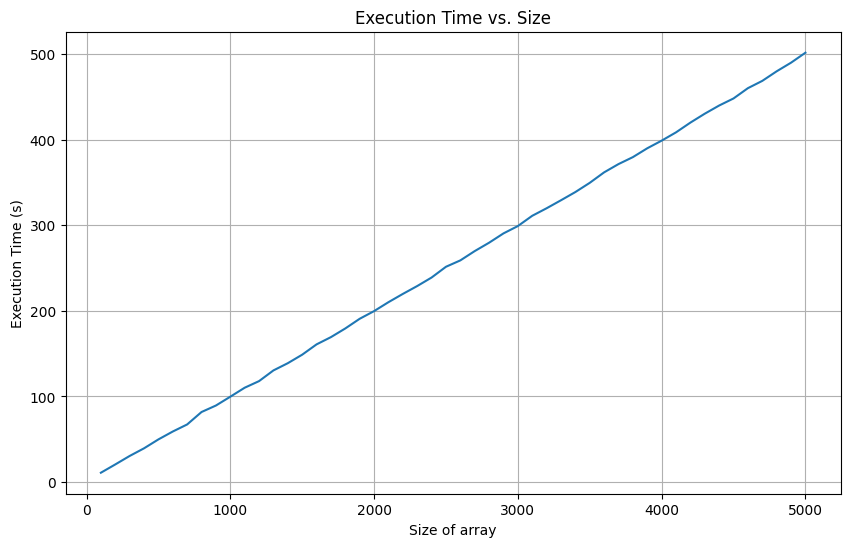

In [13]:
import matplotlib.pyplot as plt
import numpy as np

sizes = np.arange(100, 5100, 100)  # Sizes from 100 to 5000 with a step of 100
plt.figure(figsize=(10, 6))
plt.plot(sizes, exeTime, label='Execution Time')

plt.xlabel('Size of array')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs. Size')
plt.grid(True)

plt.show()